# Clustering 

### This Script Contains the Following Points:
#### 1. Importing Libraries & Data
#### 2. Creating Subset without Categorical Variables
#### 3. Renaming Columns for Clarity
#### 4. Plotting Elbow Curve using Elbow Technique
#### 5. KMeans Clustering

## 1. Importing Libraries & Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [6]:
# Ensruing the graphs created are displayed in the notebook 

%matplotlib inline

In [7]:
# Creating folder path to dataset 

path = r'/Users/C SaiVishwanath/Desktop/2024 Projects/Netflix'

In [8]:
# Imporing the Netflix data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'netflix_updated_country.csv'))

In [14]:
df.shape

(2500, 14)

In [16]:
df.head(5)

,Unnamed: 0,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Days Since Join,Region,Total Months,Total Revenue
0,0,1,Basic,10.0,1/15/22,10/6/23,United States of America,28,Male,Smartphone,629,United States and Canada,21.0,209.67
1,1,2,Premium,15.0,5/9/21,6/22/23,Canada,35,Female,Tablet,774,United States and Canada,25.8,387.00
2,2,3,Standard,12.0,2/28/23,6/27/23,United Kingdom,42,Male,Smart TV,119,Europe,4.0,47.60
3,3,4,Standard,12.0,10/7/22,6/26/23,Australia,51,Female,Laptop,262,Asia-Pacific,8.7,104.80
4,4,5,Basic,10.0,1/5/23,6/28/23,Germany,33,Male,Smartphone,174,Europe,5.8,58.00


In [18]:
# Dropping 'Unnamed: 0' column

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [20]:
df.dtypes

User ID                int64
Subscription Type     object
Monthly Revenue      float64
Join Date             object
Last Payment Date     object
Country               object
Age                    int64
Gender                object
Device                object
Days Since Join        int64
Region                object
Total Months         float64
Total Revenue        float64
dtype: object

In [28]:
df.shape

(2500, 13)

## 2. Creating Subset without Categorical Variables

In [24]:
# Creating subset without categorical variables to prepare for clustering
# Exclude: User ID, Subscription Type, Join Date, Last Payment Date, Country, Gender, Device, and Region

# Creating a list of columns to exclude
columns_to_exclude = ['User ID', 'Subscription Type', 'Join Date', 'Last Payment Date', 'Country', 'Gender', 'Device', 'Region']

# Creating the subset olumns
df_subset = df.drop(columns=columns_to_exclude)

In [26]:
df_subset.shape

(2500, 5)

In [30]:
# The shape matches the amount of columns excluded
# Printing head to make sure
df_subset.head(5)

,Monthly Revenue,Age,Days Since Join,Total Months,Total Revenue
0,10.0,28,629,21.0,209.67
1,15.0,35,774,25.8,387.00
2,12.0,42,119,4.0,47.60
3,12.0,51,262,8.7,104.80
4,10.0,33,174,5.8,58.00


## 3. Renaming Columns for Clarity

In [34]:
# Renaming Monthly Revenue to Monthly Fee

df_subset = df_subset.rename(columns={'Monthly Revenue': 'Monthly Fee'})

In [36]:
df_subset.head(5)

,Monthly Fee,Age,Days Since Join,Total Months,Total Revenue
0,10.0,28,629,21.0,209.67
1,15.0,35,774,25.8,387.00
2,12.0,42,119,4.0,47.60
3,12.0,51,262,8.7,104.80
4,10.0,33,174,5.8,58.00


## 4. Plotting Elbow Curve using Elbow Technique

In [39]:
# Using Elbow technique to identify the optimal number of clusters to use for the data

In [41]:
# Defining the range of potential clusters in the data.
# Using 1 and 10 based on lesson
num_cl = range(1, 10) 

# Defining kmeans clusters in the range above
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [45]:
# Creating a score that represents the number of rate of variation for the given cluster option
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))] 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [47]:
# Updating kmeans objects, make sure n_clusters is defined as per warning
kmeans = [KMeans(n_clusters=n, n_init=10) for n in range(1, 11)]

# Creating a score that represents the number of rate of variation for the given cluster option
score = [kmeans[i].fit(df_subset).score(df_subset) for i in range(len(kmeans))]

In [49]:
score

[-40429015.29765344,
 -15156664.731587013,
 -8535045.10630478,
 -5500098.445292106,
 -4031233.9103983445,
 -3176167.4913152857,
 -2641705.536492766,
 -2232070.4292700845,
 -1991118.696833466,
 -1800042.865668713]

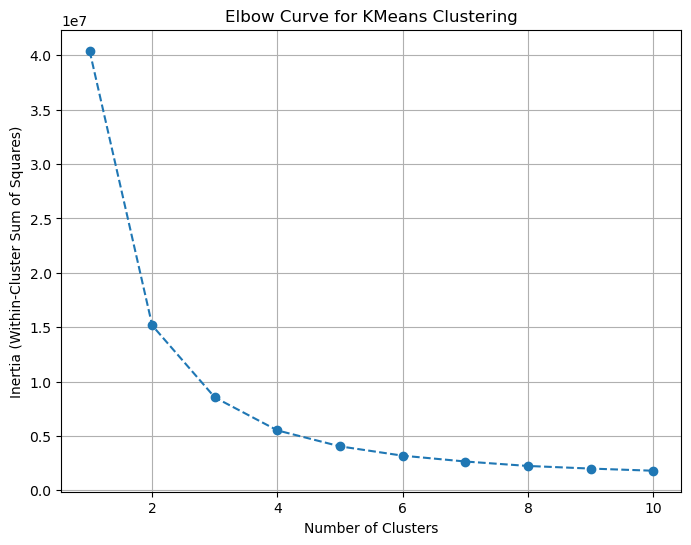

In [55]:
# Define a range of cluster numbers to test
cluster_range = range(1, 11)  
inertia_values = []

# Looping through the cluster range and calculating the strength of the links for each number of clusters (inertia)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(df_subset)
    inertia_values.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Curve for KMeans Clustering')
plt.grid(True)
plt.show()


**Notes:** 
- In the elbow curve above, there is a large jump from two to four on the x-axis, but after that, the curve straightens out.
- This means that the optimal count for clusters is 4.

## 5. KMeans Clustering

In [62]:
# Creating the k-means object

kmeans = KMeans(n_clusters = 4) 

In [64]:
# Fitting the k-means object to the data.

kmeans.fit(df_subset)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [66]:
# Initializing KMeans with n_clusters=4 and explicitly setting n_init to 10 as per warning above
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)

# Fitting the k-means object to the data
kmeans.fit(df_subset)


KMeans(n_clusters=4, n_init=10, random_state=42)

In [70]:
# Printing the cluster centers 
print(kmeans.cluster_centers_)

[[ 12.42269327  39.09102244 264.2394015    8.80685786 109.08562344]
 [ 12.62731481  37.97453704 499.52083333  16.65046296 209.81576389]
 [ 12.56311745  38.88583974 372.24368825  12.40724479 155.59926454]
 [ 12.41690141  38.89577465 145.50985915   4.85014085  60.25230986]]


In [72]:
# Creating a column in df_subset with values corresponding to which cluster every observation belongs

df_subset['clusters'] = kmeans.fit_predict(df_subset)

In [74]:
df_subset.head()

,Monthly Fee,Age,Days Since Join,Total Months,Total Revenue,clusters
0,10.0,28,629,21.0,209.67,1
1,15.0,35,774,25.8,387.00,1
2,12.0,42,119,4.0,47.60,3
3,12.0,51,262,8.7,104.80,0
4,10.0,33,174,5.8,58.00,3


In [78]:
# Checking how many observations fall into each cluster
df_subset['clusters'].value_counts()

clusters
2    910
0    804
1    432
3    354
Name: count, dtype: int64

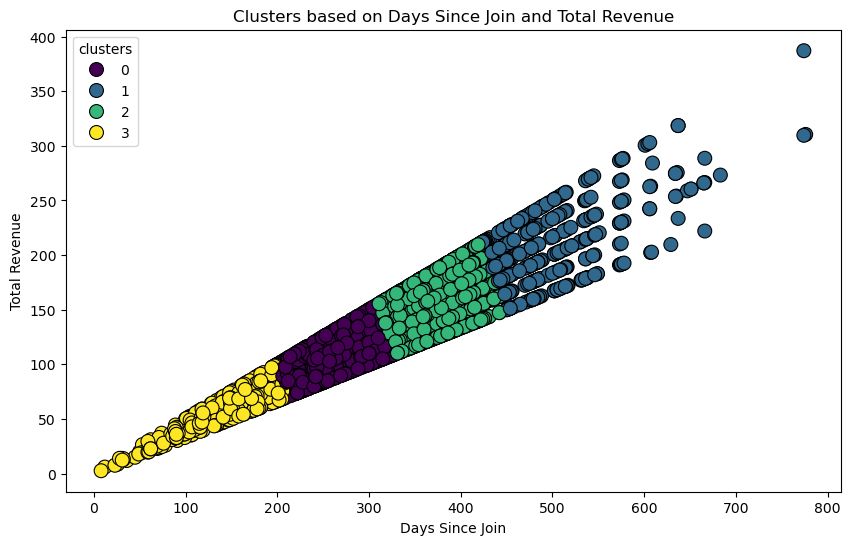

In [118]:
# Plotting the clusters for the "Days Since Join" and "Total Revenue" variables.

plt.figure(figsize=(10, 6))

# Creating scatterplot
clusters_scatterplot=sns.scatterplot(
    x='Days Since Join', 
    y='Total Revenue', 
    hue='clusters', 
    data=df_subset, 
    palette='viridis',  
    s=100,              
    edgecolor='black' )

# Labels and title
plt.title('Clusters based on Days Since Join and Total Revenue')
plt.xlabel('Days Since Join')
plt.ylabel('Total Revenue')
ax.grid(False)

# Show the plot
plt.show()

In [120]:
#Export chart to project folder
clusters_scatterplot.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','clusters_scatterplot.png'))

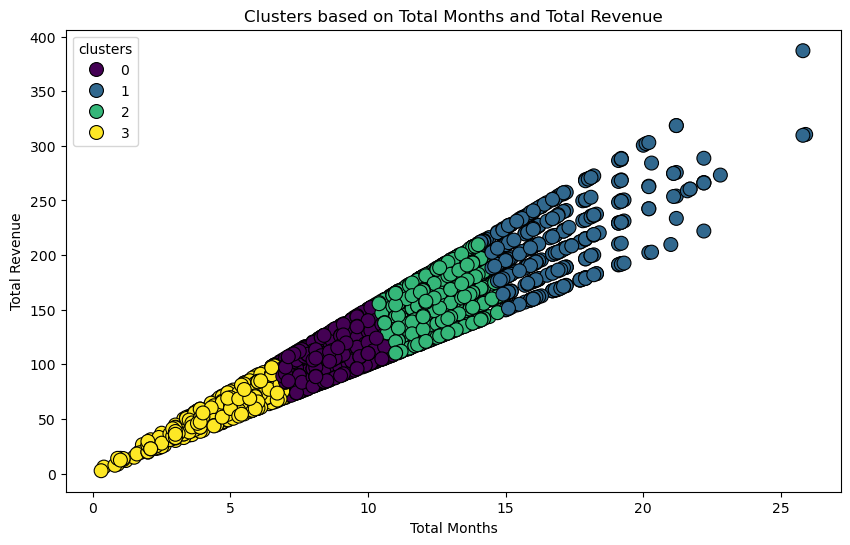

In [116]:
# Plotting the clusters for the "Total Revenue" and "Total Months" variables
plt.figure(figsize=(10, 6))

# Creating scatterplot
clusters_scatterplot_2 = sns.scatterplot(
    x='Total Months', 
    y='Total Revenue',  
    hue='clusters', 
    data=df_subset, 
    palette='viridis',  
    s=100,              
    edgecolor='black'
)

# Labels and title
plt.title('Clusters based on Total Months and Total Revenue')
plt.xlabel('Total Months')  
plt.ylabel('Total Revenue')
ax.grid(False)

# Show the plot
plt.show()

In [122]:
#Export chart to project folder
clusters_scatterplot_2.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','clusters_scatterplot_2.png'))

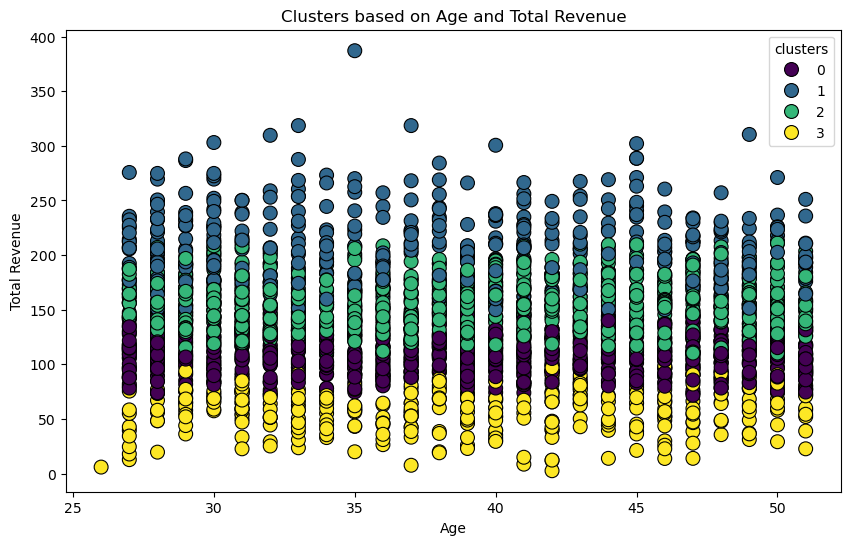

In [114]:
# Plotting the clusters for the "Age" and "Total Revenue" variables.

plt.figure(figsize=(10, 6))

# Creating scatterplot
clusters_scatterplot_3=sns.scatterplot(
    x='Age', 
    y='Total Revenue', 
    hue='clusters', 
    data=df_subset, 
    palette='viridis',  
    s=100,              
    edgecolor='black' )

# Labels and title
plt.title('Clusters based on Age and Total Revenue')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
ax.grid(False)

# Show the plot
plt.show()

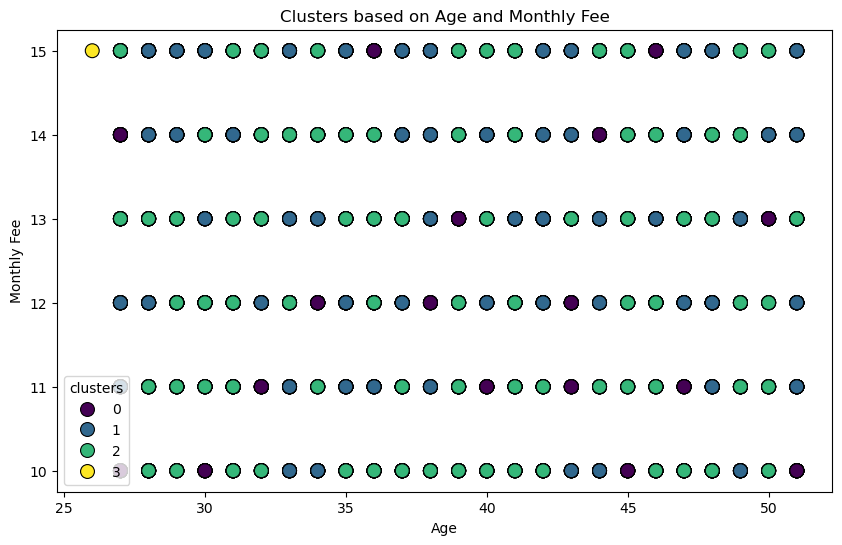

In [112]:
# Plotting the clusters for the "Age" and "Monthly Fee" variables.

plt.figure(figsize=(10, 6))

# Creating scatterplot
clusters_scatterplot_4=sns.scatterplot(
    x='Age', 
    y='Monthly Fee', 
    hue='clusters', 
    data=df_subset, 
    palette='viridis',  
    s=100,              
    edgecolor='black' )

# Labels and title
plt.title('Clusters based on Age and Monthly Fee')
plt.xlabel('Age')
plt.ylabel('Monthly Fee')
ax.grid(False)

# Show the plot
plt.show()

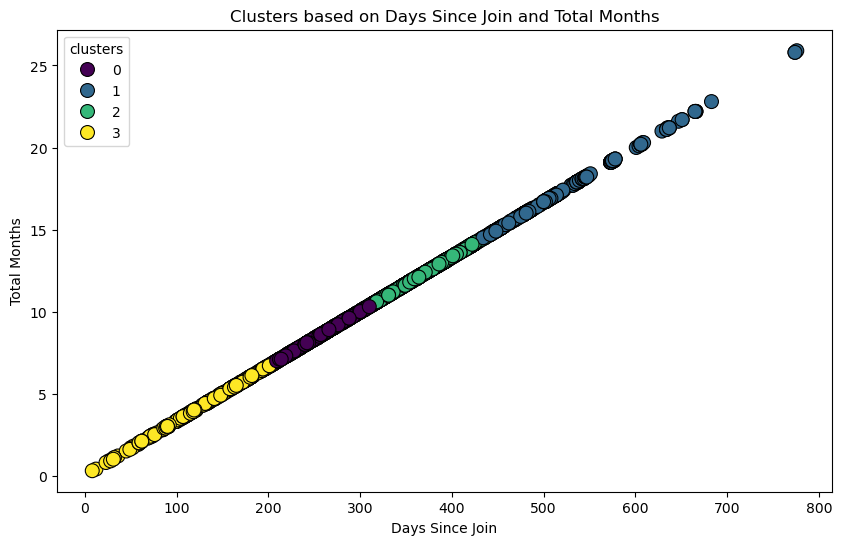

In [110]:
# Plotting the clusters for the "Days Since Join" and "Total Months" variables.

plt.figure(figsize=(10, 6))

# Creating scatterplot
clusters_scatterplot_5=sns.scatterplot(
    x='Days Since Join', 
    y='Total Months', 
    hue='clusters', 
    data=df_subset, 
    palette='viridis',  
    s=100,              
    edgecolor='black' )

# Labels and title
plt.title('Clusters based on Days Since Join and Total Months')
plt.xlabel('Days Since Join')
plt.ylabel('Total Months')
ax.grid(False)

# Show the plot
plt.show()

In [124]:
#Export chart to project folder
clusters_scatterplot_5.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','clusters_scatterplot_5.png'))

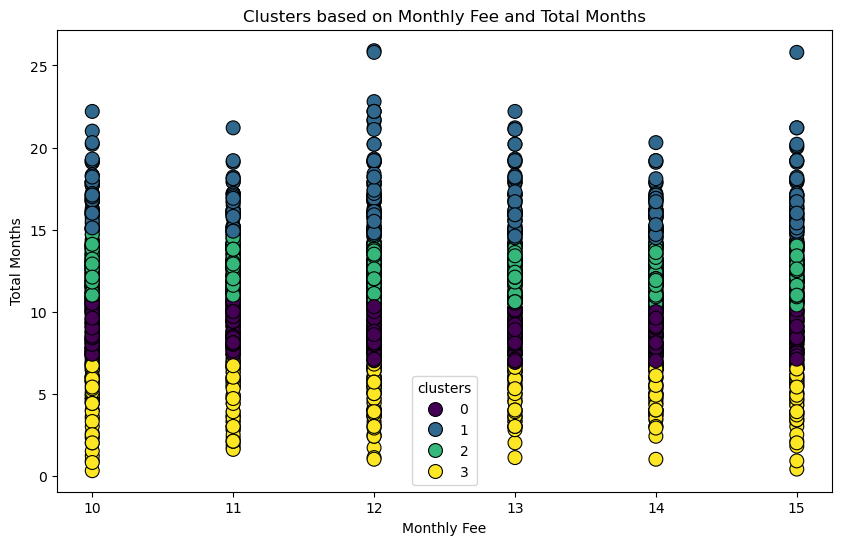

In [141]:
# Plotting the clusters for the "Monthly Fee" and "Total Months" variables.

plt.figure(figsize=(10, 6))

# Creating scatterplot
clusters_scatterplot_5=sns.scatterplot(
    x='Monthly Fee', 
    y='Total Months', 
    hue='clusters', 
    data=df_subset, 
    palette='viridis',  
    s=100,              
    edgecolor='black' )

# Labels and title
plt.title('Clusters based on Monthly Fee and Total Months')
plt.xlabel('Monthly Fee')
plt.ylabel('Total Months')
ax.grid(False)

# Show the plot
plt.show()

**Observations:**
- The scatterplots show a linear relationship for the 'Days Since Join' and 'Total Revenue' variables, which makes sense as there was a linear relationship when the regression analysis was conducted
- The same goes for the scatterplot with 'Total Months' and 'Total Revene' variables as well as the scatterplot with 'Days Since Join' and 'Total Months' variables
- The scatterplots showing 'Age' and 'Total Revenue' and 'Age' and 'Monthly Fee' do not show any relationship, which is expected based on the regression analysis
- The Scatterplot showing 'Monthly Fee' and 'Total Months' also shows no relationship, which was expected

**Notes on Further Analysis:**
- Since the monthly fee does not seem to impact the length of a subscription, raising the monthly fee may not lead to loss of subscribers

In [137]:
df_subset.loc[df_subset['clusters'] == 3, 'cluster'] = 'blue'
df_subset.loc[df_subset['clusters'] == 2, 'cluster'] = 'green'
df_subset.loc[df_subset['clusters'] == 1, 'cluster'] = 'purple'
df_subset.loc[df_subset['clusters'] == 0, 'cluster'] = 'yellow'

In [139]:
# Printing Descriptive Statistics
df_subset.groupby('cluster').agg({'Days Since Join':['mean', 'median'], 
                         'Total Months':['mean', 'median'], 
                         'Total Revenue':['mean', 'median'],
                           'Age':['mean', 'median'],
                          'Monthly Fee':['mean', 'median']})

Days Since Join        Total Months        Total Revenue          \
                   mean median         mean median          mean  median   
cluster                                                                    
blue         145.358757  153.0     4.845198   5.10     60.141441   62.20   
green        372.301099  371.0    12.409121  12.40    155.629593  154.73   
purple       499.520833  484.0    16.650463  16.10    209.815764  207.20   
yellow       264.227612  262.5     8.806468   8.75    109.097226  108.33   

               Age        Monthly Fee         
              mean median        mean median  
cluster                                       
blue     38.923729   39.0   12.409605   12.0  
green    38.896703   39.0   12.563736   13.0  
purple   37.974537   38.0   12.627315   13.0  
yellow   39.065920   39.0   12.425373   12.0

**Notes:**
- The summary statistics support the hypothesis that users who have been subscribers for a longer period tend to generate higher total revenue. The Purple Cluster, which has the longest subscription duration, also has the highest total revenue. Similarly, the Green Cluster, with the second longest duration, also ranks second in terms of revenue. Meanwhile, the Blue Cluster, with the shortest subscription duration, generates the least revenue. This suggests a positive correlation between the length of subscription and total revenue.